<b><font color="SteelBlue" size="+3">Anticipez les besoins en consommation de bâtiments</font></b>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Contexte" data-toc-modified-id="Contexte-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Contexte</a></span></li><li><span><a href="#Objectifs-de-l'analyse" data-toc-modified-id="Objectifs-de-l'analyse-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectifs de l'analyse</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Exploration-des-données" data-toc-modified-id="Exploration-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration des données</a></span><ul class="toc-item"><li><span><a href="#EdStatsCountry-Series" data-toc-modified-id="EdStatsCountry-Series-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>EdStatsCountry-Series</a></span><ul class="toc-item"><li><span><a href="#Display" data-toc-modified-id="Display-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Display</a></span></li><li><span><a href="#Structure" data-toc-modified-id="Structure-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Structure</a></span></li><li><span><a href="#Valeurs-manquantes" data-toc-modified-id="Valeurs-manquantes-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Valeurs manquantes</a></span></li><li><span><a href="#Identification-des-doublons" data-toc-modified-id="Identification-des-doublons-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Identification des doublons</a></span></li><li><span><a href="#Pré-analyse" data-toc-modified-id="Pré-analyse-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Pré-analyse</a></span></li></ul></li><li><span><a href="#EdStatsCountry" data-toc-modified-id="EdStatsCountry-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>EdStatsCountry</a></span><ul class="toc-item"><li><span><a href="#Display" data-toc-modified-id="Display-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Display</a></span></li><li><span><a href="#Structure" data-toc-modified-id="Structure-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Structure</a></span></li><li><span><a href="#Valeurs-manquantes" data-toc-modified-id="Valeurs-manquantes-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Valeurs manquantes</a></span></li><li><span><a href="#Identification-des-doublons" data-toc-modified-id="Identification-des-doublons-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Identification des doublons</a></span></li><li><span><a href="#Pré-analyse" data-toc-modified-id="Pré-analyse-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Pré-analyse</a></span></li></ul></li><li><span><a href="#EdStatsData" data-toc-modified-id="EdStatsData-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>EdStatsData</a></span><ul class="toc-item"><li><span><a href="#Display" data-toc-modified-id="Display-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Display</a></span></li><li><span><a href="#Structure" data-toc-modified-id="Structure-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Structure</a></span></li><li><span><a href="#Valeurs-manquantes" data-toc-modified-id="Valeurs-manquantes-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Valeurs manquantes</a></span></li><li><span><a href="#Identification-des-doublons" data-toc-modified-id="Identification-des-doublons-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Identification des doublons</a></span></li><li><span><a href="#Pré-analyse" data-toc-modified-id="Pré-analyse-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Pré-analyse</a></span></li></ul></li><li><span><a href="#EdStatsFootNote" data-toc-modified-id="EdStatsFootNote-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>EdStatsFootNote</a></span><ul class="toc-item"><li><span><a href="#Display" data-toc-modified-id="Display-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Display</a></span></li><li><span><a href="#Structure" data-toc-modified-id="Structure-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Structure</a></span></li><li><span><a href="#Valeurs-manquantes" data-toc-modified-id="Valeurs-manquantes-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Valeurs manquantes</a></span></li><li><span><a href="#Identification-des-doublons" data-toc-modified-id="Identification-des-doublons-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Identification des doublons</a></span></li><li><span><a href="#Pré-analyse" data-toc-modified-id="Pré-analyse-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Pré-analyse</a></span></li></ul></li><li><span><a href="#EdStatsSeries" data-toc-modified-id="EdStatsSeries-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>EdStatsSeries</a></span><ul class="toc-item"><li><span><a href="#Display" data-toc-modified-id="Display-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Display</a></span></li><li><span><a href="#Structure" data-toc-modified-id="Structure-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Structure</a></span></li><li><span><a href="#Valeurs-manquantes" data-toc-modified-id="Valeurs-manquantes-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Valeurs manquantes</a></span></li><li><span><a href="#Identification-des-doublons" data-toc-modified-id="Identification-des-doublons-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Identification des doublons</a></span></li><li><span><a href="#Pré-analyse" data-toc-modified-id="Pré-analyse-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>Pré-analyse</a></span></li></ul></li></ul></li><li><span><a href="#Nettoyage-des-données" data-toc-modified-id="Nettoyage-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nettoyage des données</a></span><ul class="toc-item"><li><span><a href="#Sélection-des-jeux-de-données" data-toc-modified-id="Sélection-des-jeux-de-données-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sélection des jeux de données</a></span></li><li><span><a href="#Suppression-des-colonnes-vides" data-toc-modified-id="Suppression-des-colonnes-vides-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Suppression des colonnes vides</a></span></li><li><span><a href="#Liens-entre-les-jeux-de-données" data-toc-modified-id="Liens-entre-les-jeux-de-données-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Liens entre les jeux de données</a></span><ul class="toc-item"><li><span><a href="#Observation-du-lien-sur-les-Country-Code" data-toc-modified-id="Observation-du-lien-sur-les-Country-Code-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Observation du lien sur les Country Code</a></span></li><li><span><a href="#Observation-du-lien-sur-les-Indicator-Name-/-Series-Code" data-toc-modified-id="Observation-du-lien-sur-les-Indicator-Name-/-Series-Code-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Observation du lien sur les Indicator Name / Series Code</a></span></li></ul></li><li><span><a href="#Format-des-données" data-toc-modified-id="Format-des-données-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Format des données</a></span></li><li><span><a href="#Observation-des-pays-candidats" data-toc-modified-id="Observation-des-pays-candidats-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Observation des pays candidats</a></span></li></ul></li><li><span><a href="#Pré-Sélection-des-indicateurs" data-toc-modified-id="Pré-Sélection-des-indicateurs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pré-Sélection des indicateurs</a></span><ul class="toc-item"><li><span><a href="#Attainment" data-toc-modified-id="Attainment-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Attainment</a></span></li><li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Learning Outcomes</a></span></li><li><span><a href="#Secondary" data-toc-modified-id="Secondary-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Secondary</a></span></li><li><span><a href="#Tertiary" data-toc-modified-id="Tertiary-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Tertiary</a></span></li><li><span><a href="#Population" data-toc-modified-id="Population-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Population</a></span></li><li><span><a href="#Literacy" data-toc-modified-id="Literacy-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Literacy</a></span></li><li><span><a href="#Economic-Policy-&amp;-Debt:-National-accounts" data-toc-modified-id="Economic-Policy-&amp;-Debt:-National-accounts-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Economic Policy &amp; Debt: National accounts</a></span></li><li><span><a href="#Infrastructure:-Communications" data-toc-modified-id="Infrastructure:-Communications-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Infrastructure: Communications</a></span></li></ul></li><li><span><a href="#Analyse-des-indicateurs-pré-sélectionnés" data-toc-modified-id="Analyse-des-indicateurs-pré-sélectionnés-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyse des indicateurs pré-sélectionnés</a></span><ul class="toc-item"><li><span><a href="#Complétion-globale-des-données" data-toc-modified-id="Complétion-globale-des-données-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Complétion globale des données</a></span></li><li><span><a href="#Fonctions-pour-les-traitements-réalisés-sur-les-indicateurs-sélectionnés" data-toc-modified-id="Fonctions-pour-les-traitements-réalisés-sur-les-indicateurs-sélectionnés-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fonctions pour les traitements réalisés sur les indicateurs sélectionnés</a></span></li><li><span><a href="#Internet-users-(per-100-people)-(IT.NET.USER.P2)" data-toc-modified-id="Internet-users-(per-100-people)-(IT.NET.USER.P2)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Internet users (per 100 people) (IT.NET.USER.P2)</a></span><ul class="toc-item"><li><span><a href="#Etude-de-la-complétion" data-toc-modified-id="Etude-de-la-complétion-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Etude de la complétion</a></span></li><li><span><a href="#Traitement-des-valeurs-manquantes-et-année-de-reference" data-toc-modified-id="Traitement-des-valeurs-manquantes-et-année-de-reference-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Traitement des valeurs manquantes et année de reference</a></span></li><li><span><a href="#Visualisations-et-Statistiques-descriptives" data-toc-modified-id="Visualisations-et-Statistiques-descriptives-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Visualisations et Statistiques descriptives</a></span></li><li><span><a href="#Vérification-des-valeurs-hors-norme" data-toc-modified-id="Vérification-des-valeurs-hors-norme-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Vérification des valeurs hors norme</a></span></li></ul></li><li><span><a href="#Personal-computers-(per-100-people)-(IT.CMP.PCMP.P2)" data-toc-modified-id="Personal-computers-(per-100-people)-(IT.CMP.PCMP.P2)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Personal computers (per 100 people) (IT.CMP.PCMP.P2)</a></span><ul class="toc-item"><li><span><a href="#Etude-de-la-complétion" data-toc-modified-id="Etude-de-la-complétion-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Etude de la complétion</a></span></li><li><span><a href="#Traitement-des-valeurs-manquantes-et-année-de-reference" data-toc-modified-id="Traitement-des-valeurs-manquantes-et-année-de-reference-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Traitement des valeurs manquantes et année de reference</a></span></li></ul></li><li><span><a href="#Taille-du-marché-potentiel" data-toc-modified-id="Taille-du-marché-potentiel-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Taille du marché potentiel</a></span><ul class="toc-item"><li><span><a href="#Etude-de-la-complétion" data-toc-modified-id="Etude-de-la-complétion-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Etude de la complétion</a></span><ul class="toc-item"><li><span><a href="#Enrolment-in-upper-secondary-and-tertiary-education-education" data-toc-modified-id="Enrolment-in-upper-secondary-and-tertiary-education-education-5.5.1.1"><span class="toc-item-num">5.5.1.1&nbsp;&nbsp;</span>Enrolment in upper secondary and tertiary education education</a></span></li><li><span><a href="#Population-of-the-official-age-for-upper-secondary-and-tertiary-education" data-toc-modified-id="Population-of-the-official-age-for-upper-secondary-and-tertiary-education-5.5.1.2"><span class="toc-item-num">5.5.1.2&nbsp;&nbsp;</span>Population of the official age for upper secondary and tertiary education</a></span></li><li><span><a href="#Population-in-thousands" data-toc-modified-id="Population-in-thousands-5.5.1.3"><span class="toc-item-num">5.5.1.3&nbsp;&nbsp;</span>Population in thousands</a></span></li><li><span><a href="#Gross-enrolment-ratio" data-toc-modified-id="Gross-enrolment-ratio-5.5.1.4"><span class="toc-item-num">5.5.1.4&nbsp;&nbsp;</span>Gross enrolment ratio</a></span></li></ul></li><li><span><a href="#Choix-des-indicateurs-pour-calculer-la-taille-du-marché-potentiel" data-toc-modified-id="Choix-des-indicateurs-pour-calculer-la-taille-du-marché-potentiel-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Choix des indicateurs pour calculer la taille du marché potentiel</a></span></li><li><span><a href="#Visualisations-et-Statistiques-descriptives" data-toc-modified-id="Visualisations-et-Statistiques-descriptives-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Visualisations et Statistiques descriptives</a></span></li><li><span><a href="#Vérification-des-valeurs-hors-norme" data-toc-modified-id="Vérification-des-valeurs-hors-norme-5.5.4"><span class="toc-item-num">5.5.4&nbsp;&nbsp;</span>Vérification des valeurs hors norme</a></span></li></ul></li><li><span><a href="#GDP-per-capita-(current-US$)-(NY.GDP.PCAP.CD)" data-toc-modified-id="GDP-per-capita-(current-US$)-(NY.GDP.PCAP.CD)-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>GDP per capita (current US$) (NY.GDP.PCAP.CD)</a></span><ul class="toc-item"><li><span><a href="#Etude-de-la-complétion" data-toc-modified-id="Etude-de-la-complétion-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Etude de la complétion</a></span></li><li><span><a href="#Traitement-des-valeurs-manquantes-et-année-de-reference" data-toc-modified-id="Traitement-des-valeurs-manquantes-et-année-de-reference-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Traitement des valeurs manquantes et année de reference</a></span></li><li><span><a href="#Visualisations-et-Statistiques-descriptives" data-toc-modified-id="Visualisations-et-Statistiques-descriptives-5.6.3"><span class="toc-item-num">5.6.3&nbsp;&nbsp;</span>Visualisations et Statistiques descriptives</a></span></li><li><span><a href="#Vérification-des-valeurs-hors-norme" data-toc-modified-id="Vérification-des-valeurs-hors-norme-5.6.4"><span class="toc-item-num">5.6.4&nbsp;&nbsp;</span>Vérification des valeurs hors norme</a></span></li></ul></li><li><span><a href="#Youth-literacy-rate,-population-15-24-years,-both-sexes-(%)-(SE.ADT.1524.LT.ZS)" data-toc-modified-id="Youth-literacy-rate,-population-15-24-years,-both-sexes-(%)-(SE.ADT.1524.LT.ZS)-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Youth literacy rate, population 15-24 years, both sexes (%) (SE.ADT.1524.LT.ZS)</a></span><ul class="toc-item"><li><span><a href="#Etude-de-la-complétion" data-toc-modified-id="Etude-de-la-complétion-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Etude de la complétion</a></span></li><li><span><a href="#Traitement-des-valeurs-manquantes-et-année-de-reference" data-toc-modified-id="Traitement-des-valeurs-manquantes-et-année-de-reference-5.7.2"><span class="toc-item-num">5.7.2&nbsp;&nbsp;</span>Traitement des valeurs manquantes et année de reference</a></span></li></ul></li></ul></li><li><span><a href="#Préparation-des-données-en-vue-de-l'analyse" data-toc-modified-id="Préparation-des-données-en-vue-de-l'analyse-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Préparation des données en vue de l'analyse</a></span><ul class="toc-item"><li><span><a href="#Création-de-l'indicateur-taille-du-marché" data-toc-modified-id="Création-de-l'indicateur-taille-du-marché-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Création de l'indicateur taille du marché</a></span></li><li><span><a href="#Ajout-des-groupes" data-toc-modified-id="Ajout-des-groupes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Ajout des groupes</a></span></li><li><span><a href="#Suppression-des-valeurs-manquantes" data-toc-modified-id="Suppression-des-valeurs-manquantes-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Suppression des valeurs manquantes</a></span></li><li><span><a href="#Normalisation-des-données" data-toc-modified-id="Normalisation-des-données-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Normalisation des données</a></span></li></ul></li><li><span><a href="#Analyse-globale-des-données-et-scoring" data-toc-modified-id="Analyse-globale-des-données-et-scoring-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyse globale des données et scoring</a></span><ul class="toc-item"><li><span><a href="#Analyse-de-corrélation" data-toc-modified-id="Analyse-de-corrélation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Analyse de corrélation</a></span></li><li><span><a href="#Analyses-univariées-et-bivariées" data-toc-modified-id="Analyses-univariées-et-bivariées-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Analyses univariées et bivariées</a></span></li><li><span><a href="#Scoring" data-toc-modified-id="Scoring-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Scoring</a></span><ul class="toc-item"><li><span><a href="#Top-10-Internet" data-toc-modified-id="Top-10-Internet-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Top 10 Internet</a></span></li><li><span><a href="#Top-10-GDP" data-toc-modified-id="Top-10-GDP-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Top 10 GDP</a></span></li><li><span><a href="#Top-10-Part-de-marché" data-toc-modified-id="Top-10-Part-de-marché-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>Top 10 Part de marché</a></span></li><li><span><a href="#Classement-Pays" data-toc-modified-id="Classement-Pays-7.3.4"><span class="toc-item-num">7.3.4&nbsp;&nbsp;</span>Classement Pays</a></span></li><li><span><a href="#Classement-Region" data-toc-modified-id="Classement-Region-7.3.5"><span class="toc-item-num">7.3.5&nbsp;&nbsp;</span>Classement Region</a></span></li><li><span><a href="#Classement-Income-Group" data-toc-modified-id="Classement-Income-Group-7.3.6"><span class="toc-item-num">7.3.6&nbsp;&nbsp;</span>Classement Income Group</a></span></li></ul></li></ul></li></ul></div>

# Introduction

## Contexte

Le projet se situe dans le cadre des efforts de la ville de Seattle pour atteindre son objectif de neutralité carbone d'ici 2050, un enjeu majeur dans la lutte contre le changement climatique. L'accent est mis sur l'analyse de la consommation énergétique et des émissions de dioxyde de carbone (CO2) des bâtiments non résidentiels, une composante significative de l'empreinte carbone de la ville. Pour cela, la ville dispose de données collectées en 2016, reflétant les consommations et émissions des bâtiments à cette période. Ces données, bien que précieuses, sont coûteuses et laborieuses à obtenir, d'où l'intérêt de développer un modèle prédictif capable d'estimer ces indicateurs pour les bâtiments non encore analysés, basé sur des caractéristiques structurelles telles que la taille, l'usage, la date de construction, ou encore la situation géographique des bâtiments.

## Objectifs

Tout d'abvord, réaliser une analyse exploratoire des données disponibles afin d'identifier les tendances, les anomalies et les relations potentielles entre les différentes variables. Et ensuite tester et comparer différents modèles de machine learning pour prédire avec précision la consommation totale d'énergie et les émissions de CO2 des bâtiments non résidentiels, sans données de consommation annuelle future, pour éviter toute fuite de données. Un intérêt particulier est porté à l'évaluation de l'utilité de l'"ENERGY STAR Score", un indicateur potentiellement pertinent mais complexe à calculer avec les méthodes actuelles. 

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from IPython.display import Image

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Council District Map - 2024 - FULL.png',
 'data',
 'Deveau_Estelle_1_notebook_exploratoire_022024.ipynb',
 'Map_of_Seattle,_divided_by_districts.png',
 'Pélec_01_EDA.ipynb',
 'Pélec_02_Modelisation.ipynb']

In [3]:
os.listdir("data/sources/")

['2016_Building_Energy_Benchmarking.csv']

In [4]:
path     = "./data/sources/"
filename = "2016_Building_Energy_Benchmarking.csv"

In [5]:
data = pd.read_csv(path + filename)

In [6]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Exploration des données

## Quick tour

In [7]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [8]:
data.shape

(3376, 46)

In [9]:
data.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

In [10]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [11]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [12]:
# Valeurs manquantes
missing_values_count = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 12.85 %


In [13]:
percent_missing_values =  round((missing_values_count / len(data)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
OSEBuildingID,0,0.00
DataYear,0,0.00
BuildingType,0,0.00
PrimaryPropertyType,0,0.00
PropertyName,0,0.00
Address,0,0.00
City,0,0.00
State,0,0.00
ZipCode,16,0.47
TaxParcelIdentificationNumber,0,0.00


<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

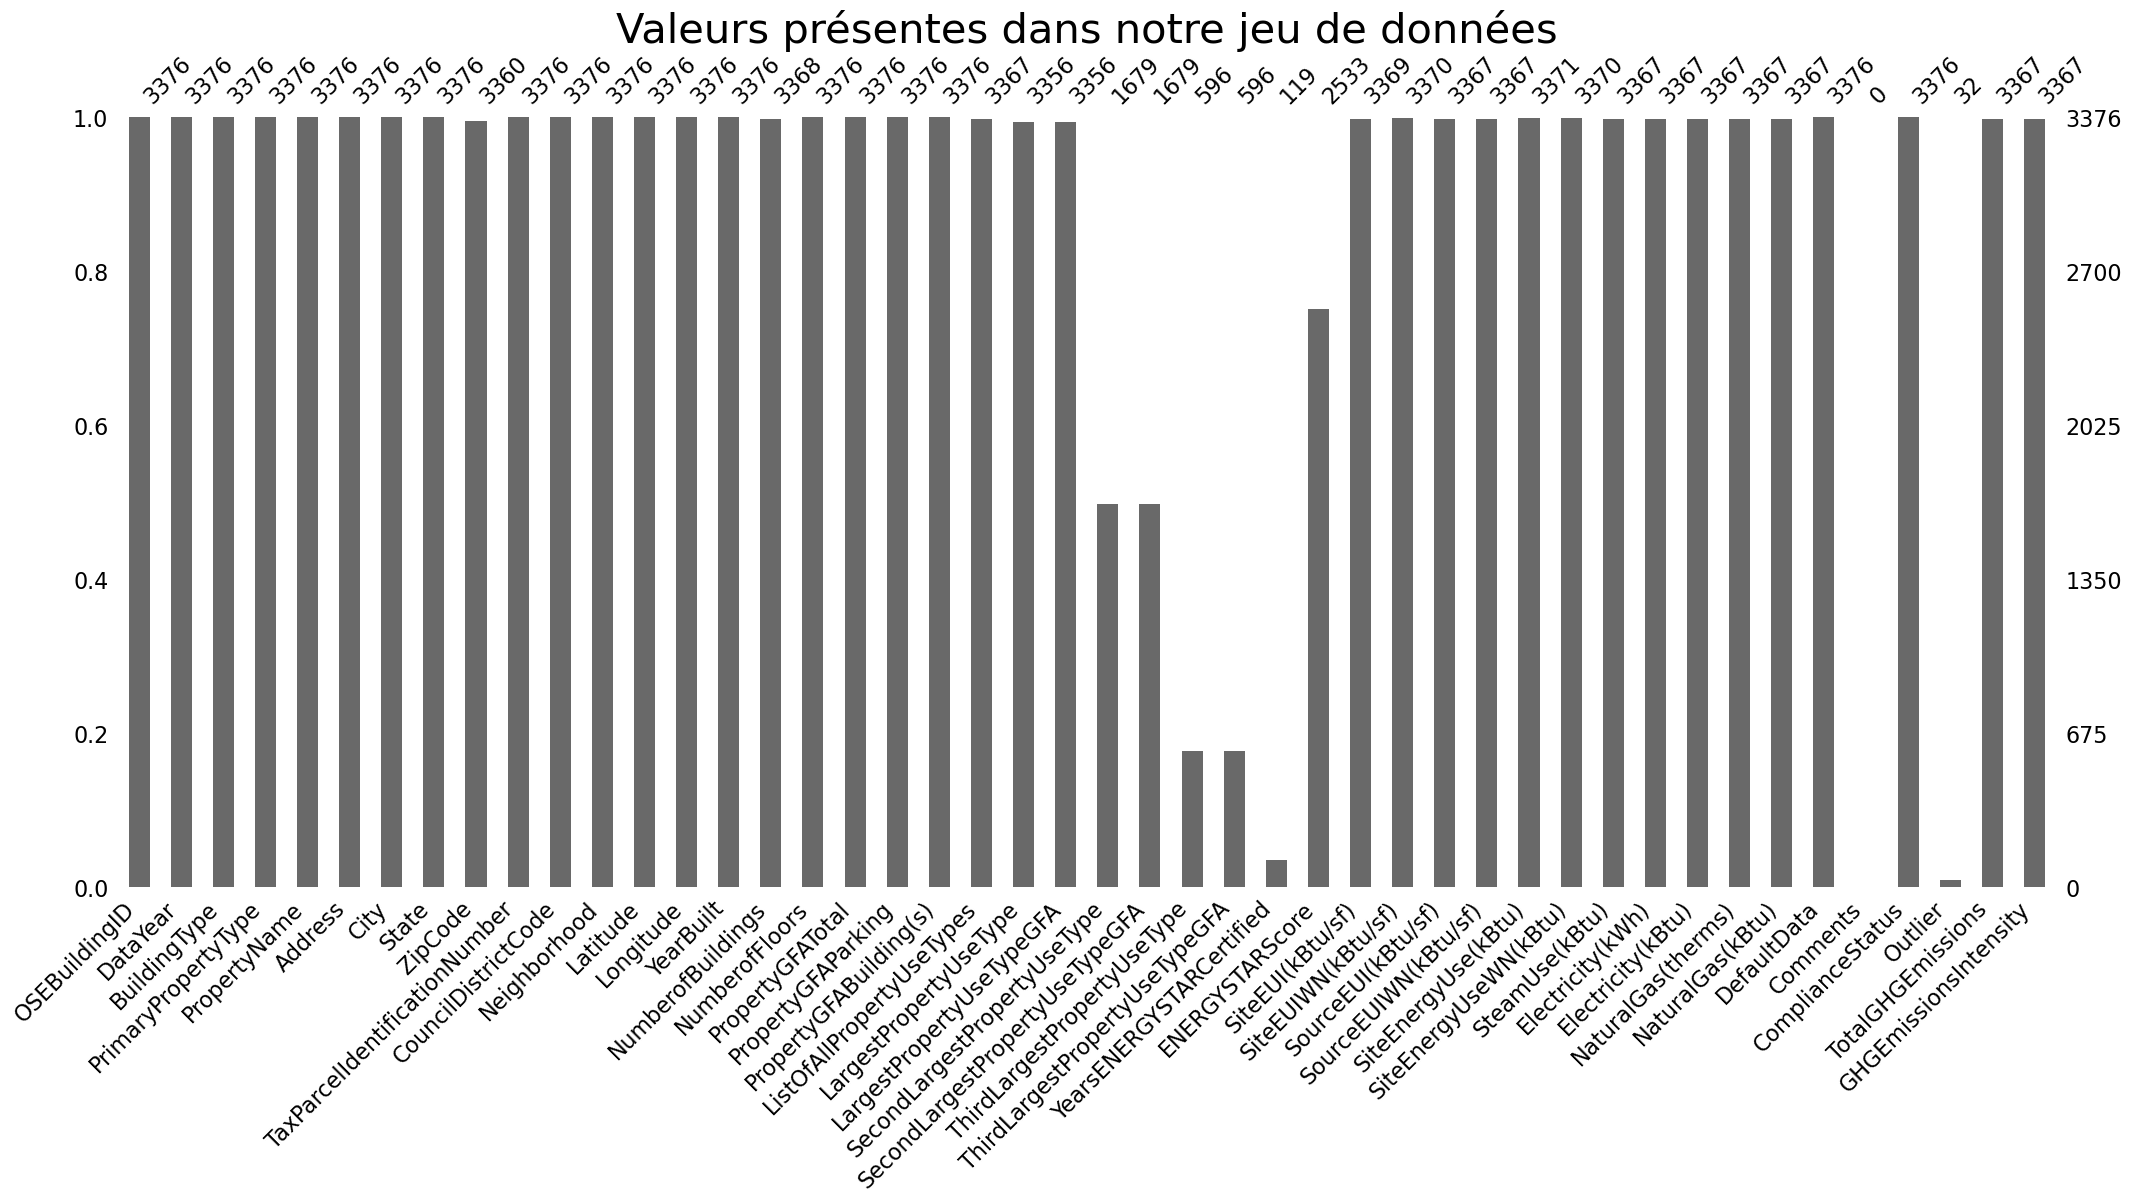

In [14]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(data)

<Axes: >

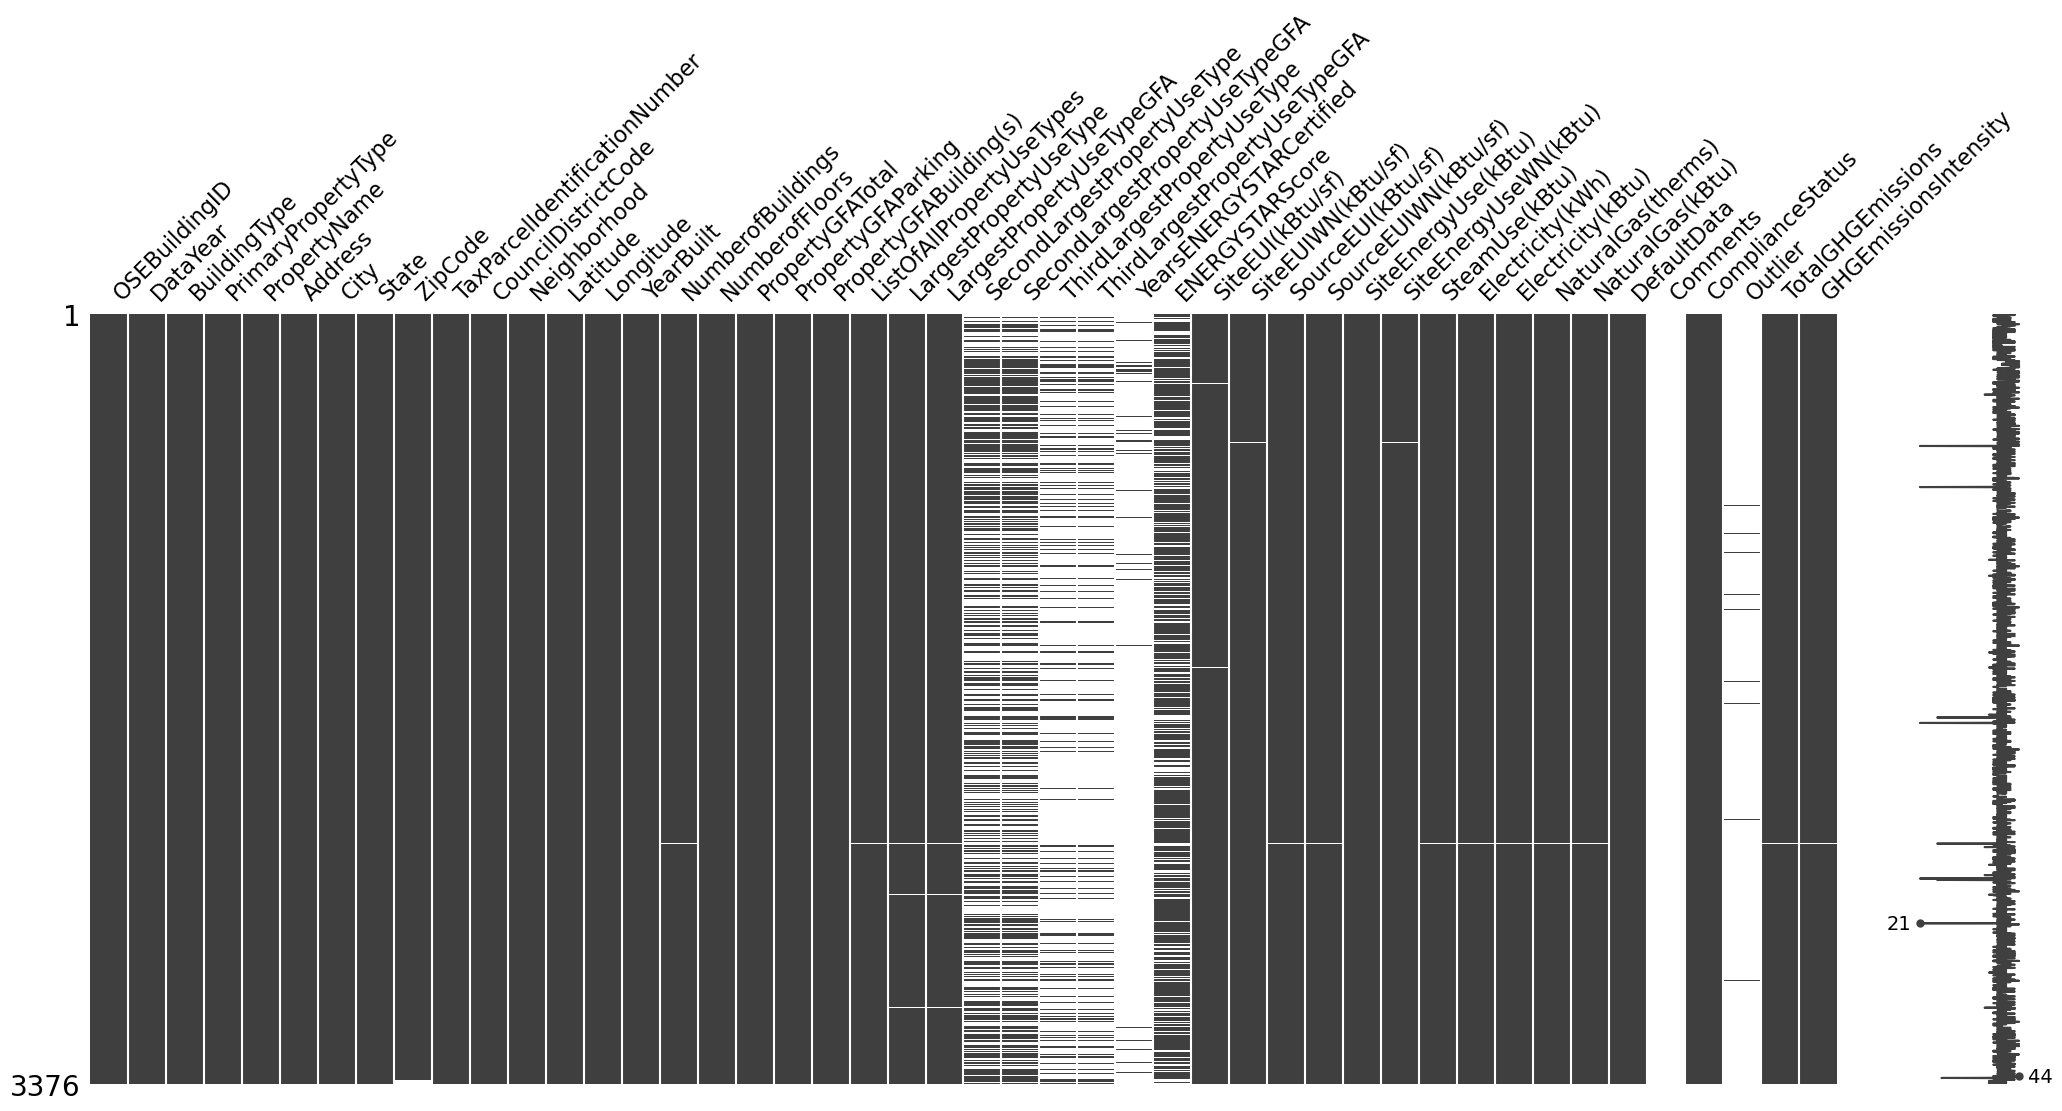

In [15]:
msno.matrix(data)

<Axes: >

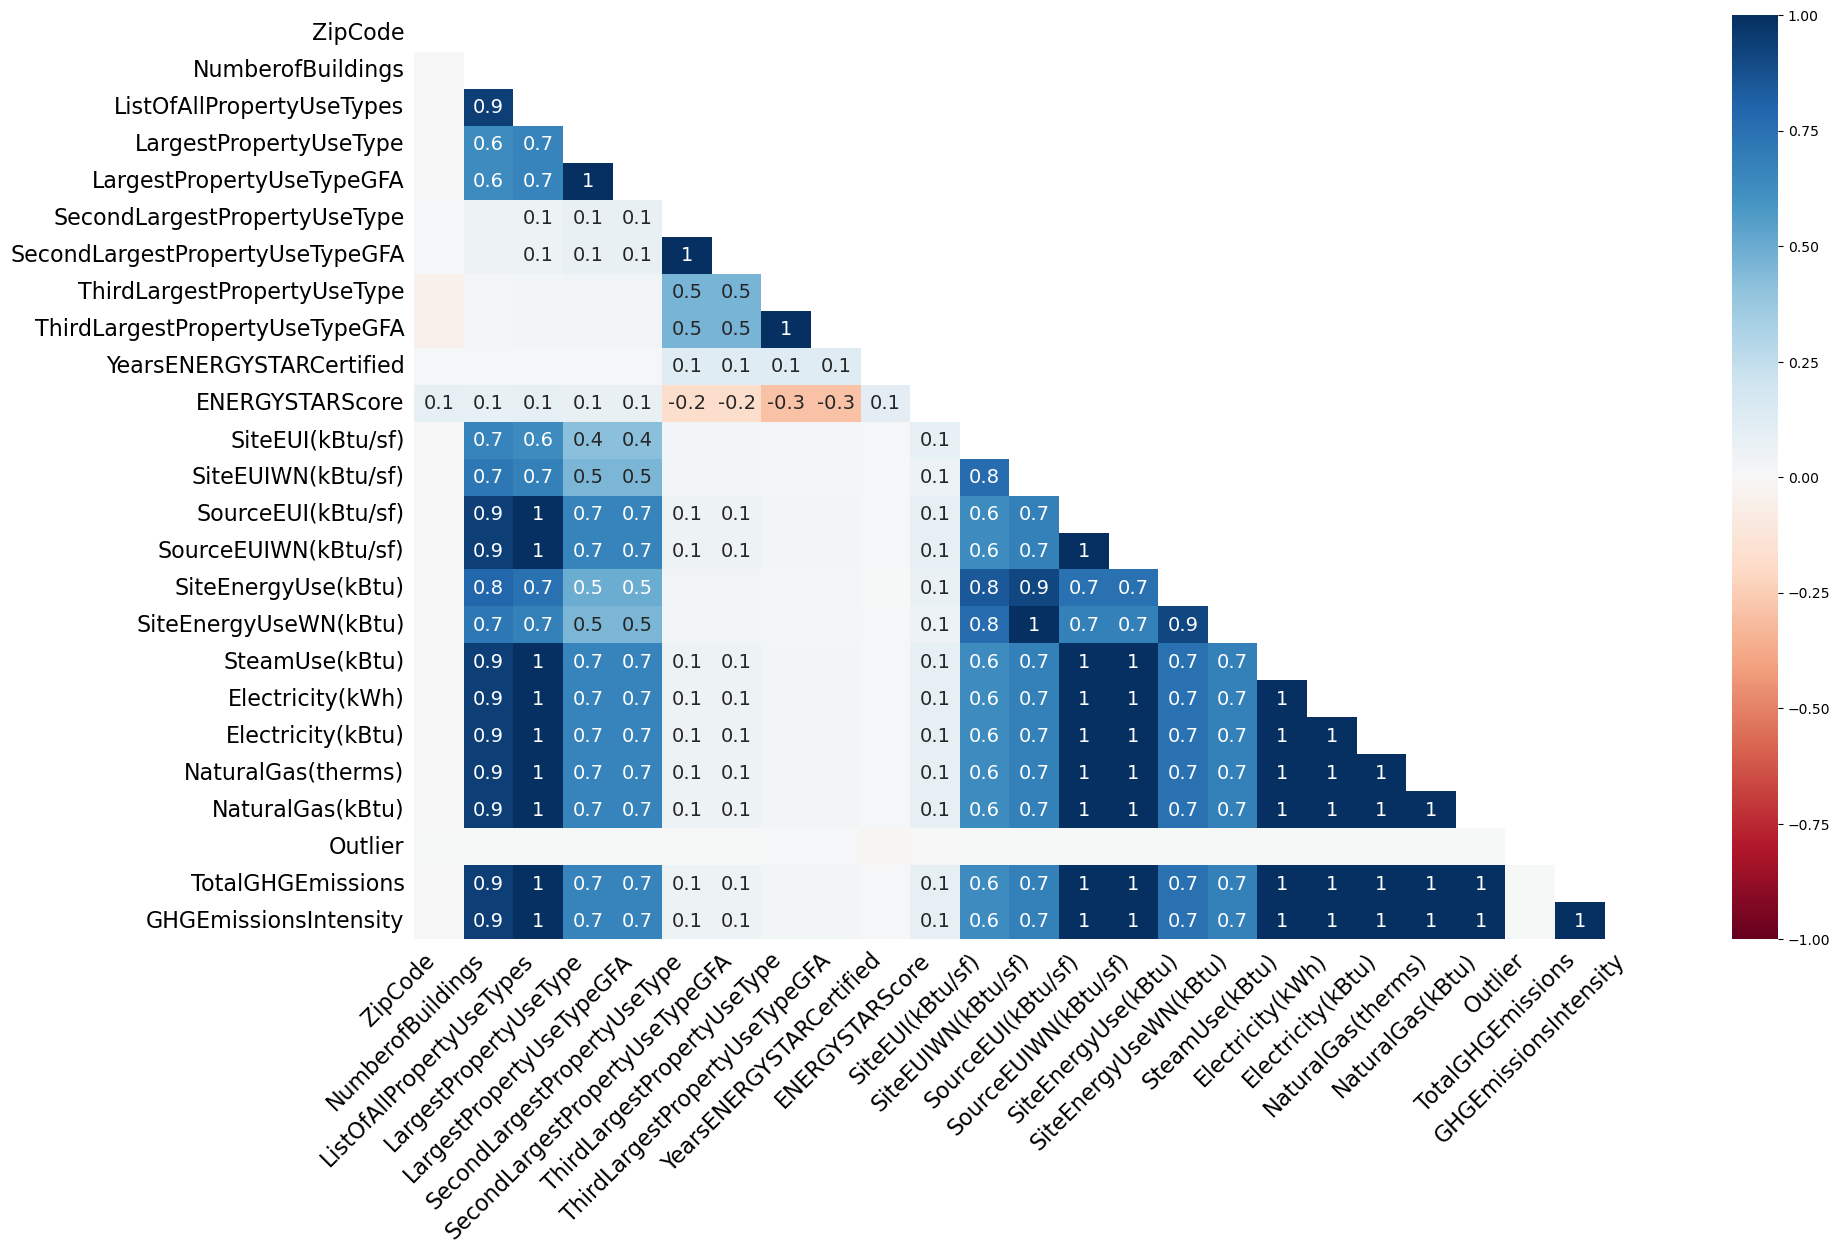

In [16]:
msno.heatmap(data)

## Définition et Compréhension des Variables

Après examen de la liste des variables et de leur définitions (https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy/about_data), nous avons établi la liste suivante :


| Name                          | Definition                                                                                     | Useful | Note |
|-------------------------------|------------------------------------------------------------------------------------------------|--------|------|
| OSEBuildingID                 | Identifiant unique attribué à chaque propriété couverte par l'ordonnance de référencement de Seattle. | Oui    | Essentiel pour suivre et identifier les propriétés |
| DataYear                      | Année civile représentée par chaque enregistrement de données.                                  | Non    |      |
| BuildingType                  | Classification du type de bâtiment de la ville de Seattle.                                     | Oui    | Utile pour des analyses par type de bâtiment |
| PrimaryPropertyType           | Utilisation principale d'une propriété (ex : bureau, magasin de détail).                        | Oui    | Utile pour des analyses par type d'utilisation |
| PropertyName                  | Nom officiel ou courant de la propriété.                                                        | Non    |      |
| Address                       | Adresse de la propriété.                                                                        | Oui    | Utile pour verifier les outliers |
| City                       | Ville de la propriété.                                                                        | Non    |      |
| State                       | Etat de la propriété.                                                                        | Non    |      |
| ZipCode                       | Code postal de la propriété.                                                                    | Oui    | Utile pour verifier les outliers |
| TaxParcelIdentificationNumber | Numéro d'identification de la parcelle fiscale de la propriété.                                 | Non    |      |
| CouncilDistrictCode           | Code du district du conseil de la ville de Seattle de la propriété.                             | Oui    | Utile pour des analyses géographiques |
| Neighborhood                  | Quartier de la propriété défini par le département des quartiers de la ville de Seattle.         | Oui    | Utile pour des analyses géographiques |
| Latitude                      | Latitude de la propriété.                                                                       | Oui    | Essentiel pour des analyses géospatiales |
| Longitude                     | Longitude de la propriété.                                                                      | Oui    | Essentiel pour des analyses géospatiales |
| YearBuilt                     | Année de construction de la propriété.                                                          | Oui    | Utile pour des analyses liées à l'âge du bâtiment |
| NumberofBuildings             | Nombre de bâtiments inclus dans le rapport de la propriété.                                     | Oui    | Utile pour des analyses de taille et de complexité |
| NumberofFloors                | Nombre d'étages signalés dans Portfolio Manager.                                                 | Oui    | Utile pour des analyses de taille et de complexité |
| PropertyGFATotal              | Surface brute totale du bâtiment et du parking.                                                 | Oui    | Utile pour des analyses de taille |
| PropertyGFAParking            | Espace total en pieds carrés de tous les types de stationnement.                                | Oui    | Utile pour des analyses de taille |
| PropertyGFABuilding(s)        | Surface brute totale en pieds carrés entre les surfaces extérieures des murs d'enceinte du bâtiment. | Non    |  |
| ListOfAllPropertyUseTypes     | Toutes les utilisations de la propriété signalées dans Portfolio Manager.                        | Oui    | Utile s'il y a plus de 3 utilisations |
| LargestPropertyUseType        | La plus grande utilisation de la propriété par la surface brute.                                | Oui    | Utile pour des analyses par type d'utilisation |
| LargestPropertyUseTypeGFA     | Surface brute de la plus grande utilisation de la propriété.                                    | Oui    | Utile pour des analyses par type d'utilisation |
| SecondLargestPropertyUseType  | La deuxième plus grande utilisation de la propriété par la surface brute.                        | Oui    | Utile pour des analyses par type d'utilisation |
| SecondLargestPropertyUseTypeGFA | Surface brute de la deuxième plus grande utilisation de la propriété.                          | Oui    | Utile pour des analyses par type d'utilisation |
| ThirdLargestPropertyUseType   | La troisième plus grande utilisation de la propriété par la surface brute.                       | Oui    | Utile pour des analyses par type d'utilisation |
| ThirdLargestPropertyUseTypeGFA| Surface brute de la troisième plus grande utilisation de la propriété.                          | Oui    | Utile pour des analyses par type d'utilisation |
| YearsENERGYSTARCertified      | Années où la propriété a reçu la certification ENERGY STAR.                                     | Non    |      |
| ENERGYSTARScore               | Score calculé pour évaluer la performance énergétique globale de la propriété.               | Oui    | Objectif |
| SiteEUI(kBtu/sf)              | Intensité d'utilisation de l'énergie sur site (EUI) de la propriété.                            | Non    | Fuite des données |
| SiteEUIWN(kBtu/sf)            | EUI du site normalisée (WN) de la propriété.                                  | Non    | Fuite des données |
| SourceEUI(kBtu/sf)            | Intensité d'utilisation de l'énergie source (EUI) de la propriété.                              | Non    | Fuite des données |
| SourceEUIWN(kBtu/sf)          | EUI de l'énergie source normalisée (WN) de la propriété.                            | Non    | Fuite des données |
| SiteEnergyUse(kBtu)           | Quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie. | Non    | Fuite des données |
| SiteEnergyUseWN(kBtu)         | Quantité annuelle d'énergie consommée par la propriété, ajustée aux conditions météorologiques moyennes sur 30 ans. | Oui | Objectif |
| SteamUse(kBtu)                | Quantité annuelle de vapeur de district consommée par la propriété sur place.                    | Oui    | Fuite des données mais peut indiquer la nature de la source d'energie |
| Electricity(kWh)              | Quantité annuelle d'électricité consommée par la propriété sur place.                            | Non    | Fuite des données |
| Electricity(kBtu)             | Quantité annuelle d'électricité consommée par la propriété sur place, mesurée en milliers de BTU. | Oui    | Fuite des données mais peut indiquer la nature de la source d'energie |
| NaturalGas(therms)            | Quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété.     | Non    | Fuite des données |
| NaturalGas(kBtu)              | Quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en milliers de BTU. | Oui | Fuite des données mais peut indiquer la nature de la source d'energie |
| DefaultData                   | La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété.  | Non    |      |
| Comments                      | Commentaires d'un propriétaire ou d'un agent pour fournir un contexte à l'utilisation de l'énergie du bâtiment. | Non  |      |
| ComplianceStatus              | Si une propriété a respecté les exigences de référencement énergétique pour l'année de déclaration en cours. | Oui  |      |
| Outlier                       | Si une propriété est un cas extrême élevé ou faible (O/N).                                       | Oui    |      |
| TotalGHGEmissions             | Quantité totale d'émissions de gaz à effet de serre.                                             | Oui    | Objectif |
| GHGEmissionsIntensity         | Émissions totales de gaz à effet de serre divisées par la surface brute de la propriété.         | Non    | Fuite des données |

In [17]:
cols_to_drop = ['DataYear', 'City', 'State', 'PropertyName','TaxParcelIdentificationNumber', 'PropertyGFABuilding(s)',
                'YearsENERGYSTARCertified','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)',
                'SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','Electricity(kWh)', 'NaturalGas(therms)',
                'DefaultData','Comments', 'GHGEmissionsIntensity']

# Liste de toutes les colonnes à conserver
cols_to_keep = data.columns.difference(cols_to_drop)

# Nettoyage des Données

## Format des données

In [18]:
data[cols_to_keep].dtypes

Address                             object
BuildingType                        object
ComplianceStatus                    object
CouncilDistrictCode                  int64
ENERGYSTARScore                    float64
Electricity(kBtu)                  float64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
Latitude                           float64
ListOfAllPropertyUseTypes           object
Longitude                          float64
NaturalGas(kBtu)                   float64
Neighborhood                        object
NumberofBuildings                  float64
NumberofFloors                       int64
OSEBuildingID                        int64
Outlier                             object
PrimaryPropertyType                 object
PropertyGFAParking                   int64
PropertyGFATotal                     int64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kB

In [19]:
# Verification des années
print("Valeurs uniques pour YearBuilt dans data:", data['YearBuilt'].unique())

Valeurs uniques pour YearBuilt dans data: [1927 1996 1969 1926 1980 1999 1904 1910 1998 1928 1922 2004 1930 1983
 1907 1916 1985 1961 2001 1991 1955 1978 1949 1989 1906 1994 1992 1990
 1950 1900 1954 1911 1973 1920 1982 1908 1959 2000 1997 1962 1970 2008
 1948 1965 1929 2010 1938 1986 2002 1923 2003 1957 1964 1941 1963 2006
 1915 1958 2009 2011 1971 2007 1951 1953 1952 1960 1937 1966 1968 1925
 1924 2005 1909 1931 1972 1914 1913 1917 1995 1981 1976 1988 1979 1947
 1984 1956 1912 1977 1921 1945 1974 1975 1946 1967 1987 1940 1932 1993
 1918 1905 1902 1939 1944 1942 1903 2012 2013 2015 1901 1919 2014 1936
 1935]


Le format de l'année dans YearBuilt est en int mais ce n'est pas génant donc nous le laissons ainsi.

In [20]:
# Verification des ComplianceStatus
print("Valeurs uniques pour ComplianceStatus dans data:", data['ComplianceStatus'].unique())

Valeurs uniques pour ComplianceStatus dans data: ['Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']


In [21]:
print(data['ComplianceStatus'].value_counts())

ComplianceStatus
Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: count, dtype: int64


In [22]:
print("Valeurs uniques pour Outlier dans data:", data['Outlier'].unique())

Valeurs uniques pour Outlier dans data: [nan 'High outlier' 'Low outlier']


In [23]:
# Verification des CouncilDistrictCode 
print("Valeurs uniques pour CouncilDistrictCode dans data:", data['CouncilDistrictCode'].unique())

Valeurs uniques pour CouncilDistrictCode dans data: [7 3 2 4 5 6 1]


In [24]:
# Verification des Neighborhood 
print("Valeurs uniques pour Neighborhood dans data:", data['Neighborhood'].unique())

Valeurs uniques pour Neighborhood dans data: ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'Central' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'CENTRAL' 'SOUTHWEST' 'DELRIDGE' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']


In [25]:
# Corrections
data['Neighborhood'] = data['Neighborhood'].str.upper()
data['Neighborhood'] = data['Neighborhood'].str.replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
print("Valeurs uniques pour Neighborhood dans data:", data['Neighborhood'].unique())

Valeurs uniques pour Neighborhood dans data: ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE']


In [26]:
# Vérification des ZipCode
print("Valeurs uniques pour ZipCode dans data:", data['ZipCode'].unique())

Valeurs uniques pour ZipCode dans data: [98101. 98121. 98104. 98154. 98118. 98105. 98112. 98125. 98109. 98070.
 98108. 98199. 98115. 98107. 98144. 98103. 98119. 98136. 98122. 98126.
 98133. 98146. 98033. 98106. 98111. 98134. 98117. 98116. 98191. 98164.
 98195. 98185. 98181. 98102. 98168. 98155. 98006. 98124. 98053. 98012.
 98013. 98028. 98178. 98114. 98127. 98165. 98011. 98198. 98113. 98040.
 98204. 98177. 98020. 98272. 98145.    nan]


In [27]:
# Vérification des LargestPropertyUseType
print("Valeurs uniques pour LargestPropertyUseType dans data:", data['LargestPropertyUseType'].unique())

Valeurs uniques pour LargestPropertyUseType dans data: ['Hotel' 'Police Station' 'Other - Entertainment/Public Assembly'
 'Multifamily Housing' 'Library' 'Fitness Center/Health Club/Gym'
 'Social/Meeting Hall' 'Courthouse' 'Other' 'K-12 School'
 'College/University' 'Automobile Dealership' 'Office'
 'Self-Storage Facility' 'Non-Refrigerated Warehouse' 'Other - Mall'
 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital (General Medical & Surgical)' 'Museum'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Other - Lodging/Residential' 'Residence Hall/Dormitory'
 'Other/Specialty Hospital' 'Financial Office' 'Distribution Center'
 'Parking' 'Worship Facility' 'Restaurant' 'Data Center' 'Laboratory'
 'Supermarket/Grocery Store' 'Convention Center'
 'Urgent Care/Clinic/Other Outpatient' nan 'Other - Services' 'Strip Mall'
 'Wholesale Club/Supercenter' 'Refrigerated Warehouse'
 'Manufacturing/Industrial Plant' 'Other - Recreation' 'Lifestyle Center'
 'Other - Public Servic

In [28]:
# Vérification des SecondLargestPropertyUseType
print("Valeurs uniques pour SecondLargestPropertyUseType dans data:", data['SecondLargestPropertyUseType'].unique())

Valeurs uniques pour SecondLargestPropertyUseType dans data: [nan 'Parking' 'Office' 'Restaurant' 'K-12 School' 'Laboratory'
 'Refrigerated Warehouse' 'Non-Refrigerated Warehouse' 'Other - Education'
 'Vocational School' 'Retail Store'
 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
 'Other - Entertainment/Public Assembly' 'Data Center' 'Swimming Pool'
 'Other' 'Courthouse' 'Residence Hall/Dormitory' 'Distribution Center'
 'Self-Storage Facility' 'Other - Services' 'Movie Theater'
 'Supermarket/Grocery Store' 'Medical Office' 'Other - Recreation'
 'Convenience Store without Gas Station' 'Performing Arts'
 'College/University' 'Other - Restaurant/Bar' 'Adult Education'
 'Enclosed Mall' 'Multifamily Housing' 'Bar/Nightclub' 'Financial Office'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Manufacturing/Industrial Plant' 'Other - Lodging/Residential'
 'Bank Branch' 'Food Service' 'Worship Facility' 'Senior Care Community'
 'Fitness Center/Health Club/Gym' 'Hotel' 'Food Sales

In [29]:
# Vérification des ThirdLargestPropertyUseType
print("Valeurs uniques pour ThirdLargestPropertyUseType dans data:", data['ThirdLargestPropertyUseType'].unique())

Valeurs uniques pour ThirdLargestPropertyUseType dans data: [nan 'Restaurant' 'Swimming Pool' 'Data Center' 'Office' 'Retail Store'
 'Other - Entertainment/Public Assembly' 'Non-Refrigerated Warehouse'
 'Other' 'Distribution Center' 'Food Service' 'Other - Services'
 'Medical Office' 'Parking' 'Other - Utility'
 'Other - Lodging/Residential' 'K-12 School'
 'Fitness Center/Health Club/Gym' 'Social/Meeting Hall'
 'Pre-school/Daycare' 'Convenience Store without Gas Station'
 'Financial Office' 'Other - Restaurant/Bar' 'Other - Education'
 'Multifamily Housing' 'Laboratory' 'Bank Branch' 'Hotel'
 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
 'Other - Recreation' 'Self-Storage Facility' 'Other - Technology/Science'
 'Refrigerated Warehouse' 'Fast Food Restaurant' 'Bar/Nightclub'
 'Manufacturing/Industrial Plant' 'Food Sales' 'Supermarket/Grocery Store'
 'Other/Specialty Hospital' 'Worship Facility' 'Strip Mall'
 'Residence Hall/Dormitory' 'Vocational School' 'College/University'
 

In [30]:
# Vérification des PrimaryPropertyType
print("Valeurs uniques pour PrimaryPropertyType dans data:", data['PrimaryPropertyType'].unique())

Valeurs uniques pour PrimaryPropertyType dans data: ['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office']


Pas de problèmes sur le format des données des 'use Type'

## Sélection des données

Suppression des variables que nous n'avons pas trouvé pertinantes pour l'étude.

In [31]:
df_filtered = data.drop(columns=cols_to_drop).copy()

Notre étude porte uniquement sur les bâtiments non résidentiel, donc nous supprimons les bâtiments non concernés.

In [32]:
# Selection des batiments résidentiels
df_filtered = df_filtered[~df_filtered['BuildingType'].str.contains("Multifamily", na=False)].copy()
df_filtered = df_filtered[~df_filtered['PrimaryPropertyType'].str.contains("Multifamily", na=False)].copy()
df_filtered = df_filtered[~df_filtered['PrimaryPropertyType'].str.contains("Residence Hall", na=False)].copy()
df_filtered = df_filtered[~df_filtered['PrimaryPropertyType'].str.contains("Senior Care Community", na=False)].copy()
df_filtered = df_filtered[~df_filtered['LargestPropertyUseType'].str.contains("Residence Hall/Dormitory", na=False)].copy()
df_filtered = df_filtered[~df_filtered['LargestPropertyUseType'].str.contains("Lodging", na=False)].copy()

In [33]:
df_filtered.shape

(1618, 29)

## Recherche des doublons

In [34]:
nb_doublons_code = df_filtered.duplicated(subset=["OSEBuildingID"]).sum()
print('Nombre de doublons sur le OSEBuildingID :', nb_doublons_code)

Nombre de doublons sur le OSEBuildingID : 0


In [35]:
nb_doublons_add = df_filtered.duplicated(subset=['Address','PropertyGFATotal']).sum()
print('Nombre de doublons sur l\'adresse :', nb_doublons_add)

Nombre de doublons sur l'adresse : 1


In [36]:
print(df_filtered[df_filtered.duplicated(['Address','PropertyGFATotal'], keep=False)].sort_values('Address'))

     OSEBuildingID    BuildingType          PrimaryPropertyType  \
348            490  NonResidential  Small- and Mid-Sized Office   
349            491  NonResidential  Small- and Mid-Sized Office   

               Address  ZipCode  CouncilDistrictCode           Neighborhood  \
348  100 West Harrison  98119.0                    7  MAGNOLIA / QUEEN ANNE   
349  100 West Harrison  98119.0                    7  MAGNOLIA / QUEEN ANNE   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
348  47.62224  -122.3585       1972                1.0               5   
349  47.62224  -122.3585       1970                1.0               5   

     PropertyGFATotal  PropertyGFAParking ListOfAllPropertyUseTypes  \
348             87178               20416           Office, Parking   
349             87178               20416           Office, Parking   

    LargestPropertyUseType  LargestPropertyUseTypeGFA  \
348                 Office                    66648.0   
349      

In [37]:
print(data[data.duplicated(['Address','PropertyGFATotal'], keep=False)].sort_values('Address'))

     OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
348            490      2016  NonResidential  Small- and Mid-Sized Office   
349            491      2016  NonResidential  Small- and Mid-Sized Office   

    PropertyName            Address     City State  ZipCode  \
348  North Tower  100 West Harrison  Seattle    WA  98119.0   
349  South Tower  100 West Harrison  Seattle    WA  98119.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode           Neighborhood  \
348                    1989200720                    7  MAGNOLIA / QUEEN ANNE   
349                    1989200740                    7  MAGNOLIA / QUEEN ANNE   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
348  47.62224  -122.3585       1972                1.0               5   
349  47.62224  -122.3585       1970                1.0               5   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
348             87178               20416 

Ce sont bien deux bâtiments différents (Tour nord et tour sud) donc  il n'y a pas de doublons.

Le OSEBuildingID nous a servi à identifier des doublons, nous pouvons maintenant le supprimer

In [38]:
df_filtered = df_filtered.drop(['OSEBuildingID'], axis=1)

## Gestion des valeurs aberrantes

In [39]:
df_filtered.dtypes.value_counts()

float64    13
object     10
int64       5
Name: count, dtype: int64

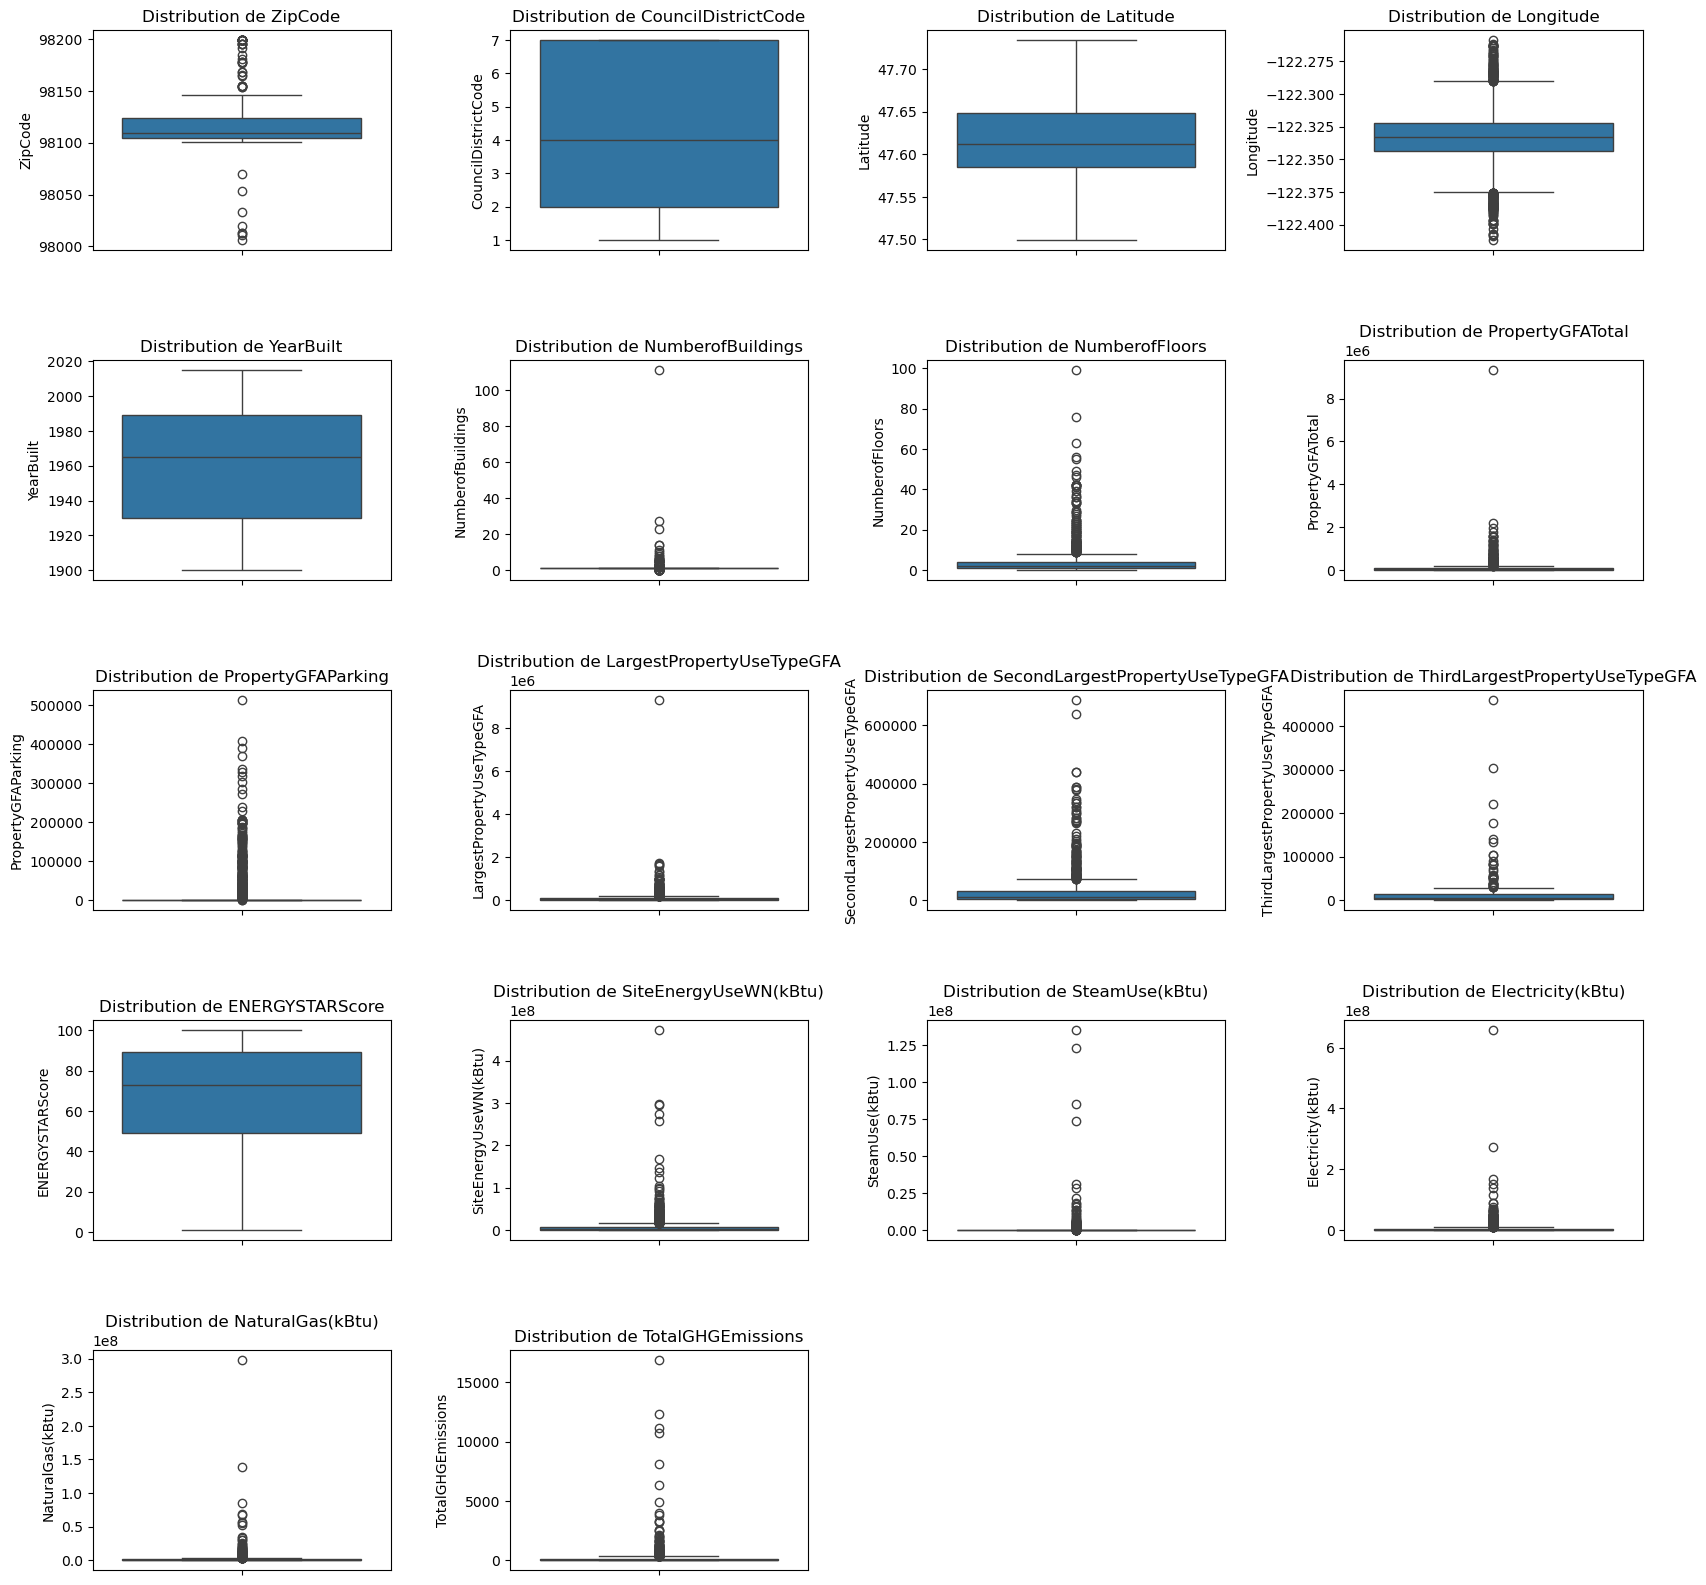

In [40]:
# Sélectionner uniquement les colonnes numériques
numerics_col = df_filtered.select_dtypes(include=['number']).columns
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for i, (ax, column) in enumerate(zip(axes.flatten(), numerics_col)):
    sns.boxplot(y=df_filtered[column], ax=ax)
    ax.set_title(f'Distribution de {column}')

# Supprimer les axes vides si le nombre de colonnes numériques est inférieur au nombre total d'axes
for j in range(i + 1, 20):
    fig.delaxes(axes.flatten()[j])

plt.show()

### Vérification des outliers de ZipCode

In [41]:
# Vérification des ZipCode
print("Valeurs uniques pour ZipCode dans data:", data['ZipCode'].unique())

Valeurs uniques pour ZipCode dans data: [98101. 98121. 98104. 98154. 98118. 98105. 98112. 98125. 98109. 98070.
 98108. 98199. 98115. 98107. 98144. 98103. 98119. 98136. 98122. 98126.
 98133. 98146. 98033. 98106. 98111. 98134. 98117. 98116. 98191. 98164.
 98195. 98185. 98181. 98102. 98168. 98155. 98006. 98124. 98053. 98012.
 98013. 98028. 98178. 98114. 98127. 98165. 98011. 98198. 98113. 98040.
 98204. 98177. 98020. 98272. 98145.    nan]


In [42]:
# Colonnes à afficher
cols_to_display = ['Address', 'ZipCode', 'Neighborhood', 'Latitude', 'Longitude']

# Filtrer les lignes où ZipCode est égal à 98145 puis afficher les colonnes spécifiées
filtered_df = df_filtered.loc[df_filtered['ZipCode'].isin([98145]), cols_to_display]

print(filtered_df)


               Address  ZipCode Neighborhood  Latitude  Longitude
3187  4500 40th Ave NE  98145.0    NORTHEAST  47.66201 -122.28386


D'après GoogleMaps, les coordonnées  47.66201, -122.28386 correspondent à cette adresse : 4800 40th Ave NE, Seattle, WA 98105, États-Unis => ZipCode à corriger

In [43]:
df_filtered.loc[df_filtered['Address'] == '4500 40th Ave NE', 'ZipCode'] = 98105

Les autres ZipCode correspondent bien à la métropole de Seattle.

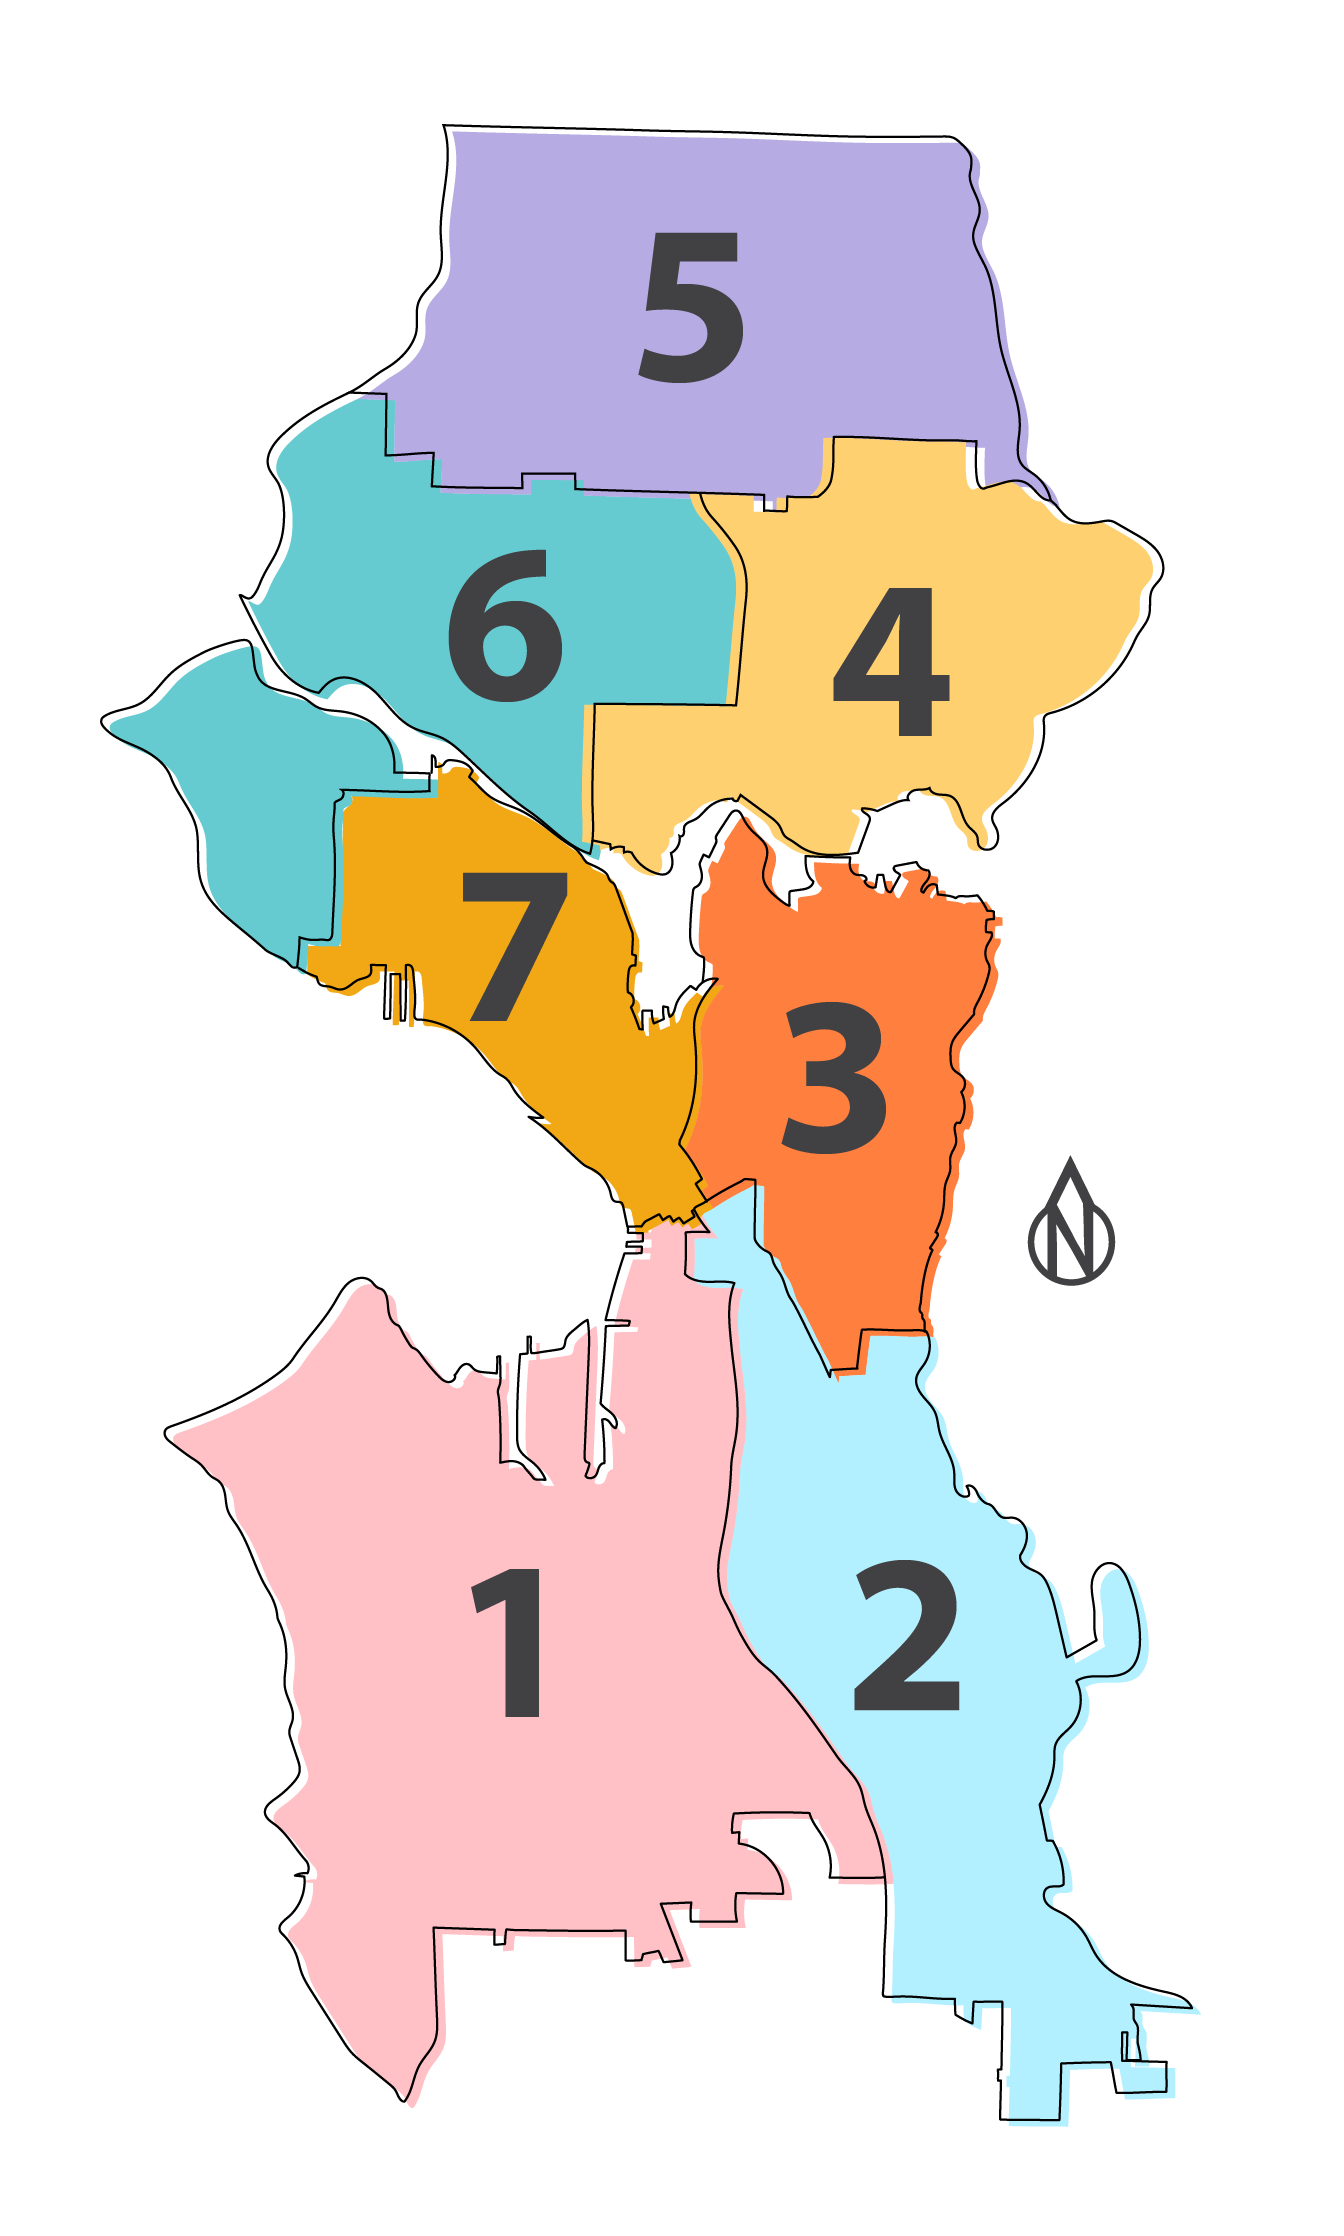

In [44]:
# Afficher les district de Seattle
Image(filename="Council District Map - 2024 - FULL.png", width=300, height=100)

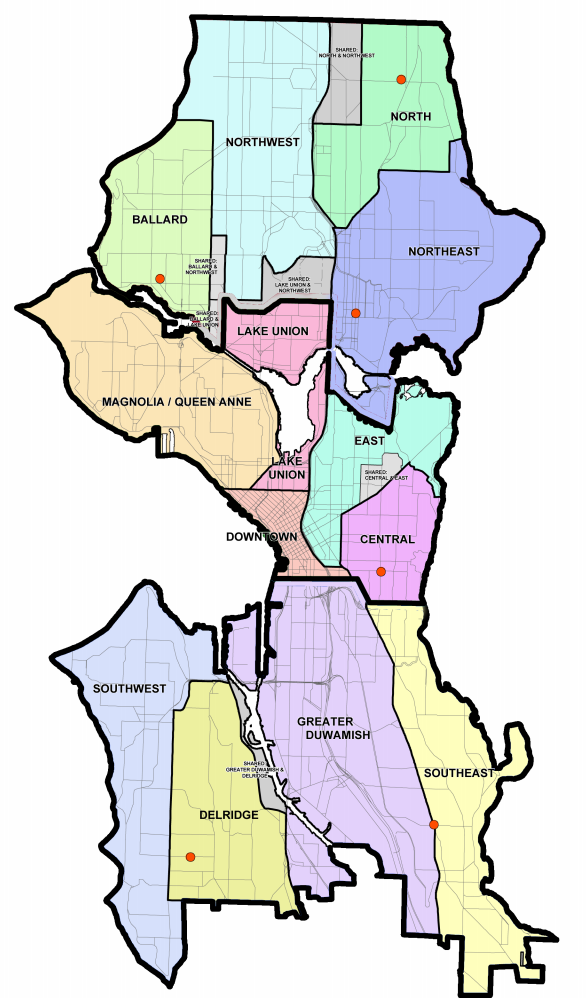

In [45]:
# Afficher les quartiers de Seattle
Image(filename="Map_of_Seattle,_divided_by_districts.png", width=400, height=150)

In [46]:
def find_outliers_by_group(df, groupby_var, outlier_var, iqr_multiplier):
    # Calculer les limites de l'IQR pour chaque groupe
    q1 = df.groupby(groupby_var)[outlier_var].quantile(0.25)
    q3 = df.groupby(groupby_var)[outlier_var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr

    # Initialiser une liste pour stocker les DataFrame des outliers
    outliers_list = []

    # Identifier les outliers pour chaque groupe
    for group in df[groupby_var].dropna().unique():
        lower_bound_group = lower_bound.get(group, np.nan)
        upper_bound_group = upper_bound.get(group, np.nan)
        # Utiliser les valeurs obtenues pour filtrer les outliers, en vérifiant aussi que les bornes ne sont pas NaN
        if not np.isnan(lower_bound_group) and not np.isnan(upper_bound_group):
            outliers_group = df[(df[groupby_var] == group) & 
                                ((df[outlier_var] < lower_bound_group) | 
                                 (df[outlier_var] > upper_bound_group))]
            if not outliers_group.empty:
                outliers_list.append(outliers_group)

    # Concaténer les DataFrame des outliers, en vérifiant d'abord si la liste n'est pas vide
    if outliers_list:
        outliers = pd.concat(outliers_list, ignore_index=True)
        return outliers
    else:
        return pd.DataFrame()  # Retourner un DataFrame vide si aucun outlier n'est trouvé



### Vérification des outliers de la longitude

Seattle :

    Longitude minimale : aux alentours de -122.436 (ouest)
    Longitude maximale : aux alentours de -122.255 (est)

In [47]:
# Définir les limites de longitude pour Seattle
longitude_min = -122.436
longitude_max = -122.255

# Sélectionner les lignes en dehors de cette fourchette de longitude
outliers_longitude = df_filtered[(df_filtered['Longitude'] < longitude_min) | (df_filtered['Longitude'] > longitude_max)]

# Afficher les valeurs aberrantes
outliers_longitude[['Address', 'ZipCode', 'Neighborhood', 'Latitude', 'Longitude', 'CouncilDistrictCode']]

,Address,ZipCode,Neighborhood,Latitude,Longitude,CouncilDistrictCode


Les valeurs sont donc atypiques mais pas abérrantes géographiquement parlant.

### Vérification des Outliers de NumberofBuildings

In [48]:
# Compter et trier le nombre de valeurs
NumberofBuildings_counts = df_filtered['NumberofBuildings'].value_counts().sort_index(ascending=False)

pd.DataFrame({'NumberofBuildings': NumberofBuildings_counts})

,NumberofBuildings
NumberofBuildings,
111.0,1
27.0,1
23.0,1
14.0,2
11.0,1
10.0,1
9.0,1
8.0,2
7.0,1


Il y a forcément au moins 1 bâtiment par adresse, la valeur la plus fréquente étant 1 on remplace les 0 par 1

In [49]:
df_filtered.loc[df_filtered['NumberofBuildings'] == 0.] = 1.

Les adresses avec plus de 7 bâtiments sont à vérifier.

In [50]:
# Sélectionner les lignes où le nombre de bâtiments est supérieur à 10
buildings_over_10 = df_filtered[df_filtered['NumberofBuildings'] > 10]
buildings_over_10[['Address', 'ZipCode', 'NumberofBuildings', 'PrimaryPropertyType']]

,Address,ZipCode,NumberofBuildings,PrimaryPropertyType
105,6000 16th Ave SW,98106.0,27.0,University
128,9600 COLLEGE WAY N,98103.0,11.0,University
162,1420 S Trenton,98108.0,14.0,Large Office
1862,1900 West Nickerson Street,98119.0,23.0,Other
2325,3307 3rd Ave. W,98119.0,14.0,University
3274,NE 45th St & Brooklyn Ave,98105.0,111.0,University


Nombre de batiments pas abérrants sauf pour l'université avec 111 bâtiments. Il n'y a pas d'université à l'adresse indiqué et quant bien même cette valeur serait trop atypique et poserait problème pour nos modèles.

In [51]:
df_filtered = df_filtered.loc[df_filtered['NumberofBuildings'] != 111.]

### Vérification des Outliers de NumberofFloors

In [52]:
# Compter et trier le nombre de valeurs
NumberofFloors_counts = df_filtered['NumberofFloors'].value_counts().sort_index(ascending=False)

pd.DataFrame({'NumberofFloors': NumberofFloors_counts})

,NumberofFloors
NumberofFloors,
99,1
76,1
63,1
56,1
55,1
49,1
47,1
46,1
42,5


In [53]:
# Colonnes à afficher
cols_to_display = ['Address', 'ZipCode','NumberofFloors', 'PrimaryPropertyType']
print(df_filtered[cols_to_display].loc[df_filtered['NumberofFloors'] >60])

                       Address  ZipCode  NumberofFloors PrimaryPropertyType
233           700 Fifth Avenue  98104.0              63        Large Office
559             701 5th Avenue  98104.0              76        Large Office
1359  5801 Beacon Avenue South  98108.0              99    Worship Facility


A corriger :

    5801 Beacon Avenue South correspond à une église => remplacer par 1

In [54]:
df_filtered.loc[df_filtered['Address'] == '5801 Beacon Avenue South', 'NumberofFloors'] = 1

In [55]:
outliers = find_outliers_by_group(df_filtered, 'PrimaryPropertyType', 'NumberofFloors', 3)
if not outliers.empty:
    display(outliers[['Address', 'ZipCode', 'NumberofFloors', 'PrimaryPropertyType']])
else:
    print("Aucun outlier trouvé.")

,Address,ZipCode,NumberofFloors,PrimaryPropertyType
0,1900 5th Avenue,98101.0,41,Hotel
1,1113 6th Ave,98101.0,33,Hotel
2,1400 6th Avenue,98101.0,34,Hotel
3,1000 Fourth Avenue,98154.0,11,Other
4,516 3RD AVE,98104.0,10,Other
5,500 5TH AVE,98104.0,19,Other
6,1900 9th Ave.,98101.0,11,Other
7,1122 3rd Ave,98101.0,15,Other
8,120 Lenora,98121.0,12,Other
9,2001 6th Ave,98121.0,33,Other


Un restaurant avec 13 étage et après vérification sur la carte, cela semble être une erreur de saisie.
Mise à 0 temporaire pour lui appliquer la moyenne.<br>
Après vérification, les autres bâtiments ne sont pas des outliers.

In [56]:
df_filtered.loc[df_filtered['Address'] == '1411 1st Avenue', 'NumberofFloors'] = 0

Aux USA on compte le rez de chaussée comme un étage. Il y a donc necessairement au moins 1 étage par batiment.
Nous allons donc remplacer les valeurs à 0 par la moyenne en fonction de leur PrimaryPropertyType.

In [57]:
# Calculer la médiane du nombre d'étages pour chaque type de propriété et convertir en entiers
mean_floors_by_type = df_filtered[df_filtered['NumberofFloors'] > 0].groupby('PrimaryPropertyType')['NumberofFloors'].median().astype(int)


# Fonction pour remplacer les zéros par la moyenne correspondante
def replace_zero_with_mean(row):
    if row['NumberofFloors'] == 0:
        return mean_floors_by_type.get(row['PrimaryPropertyType'], 0)
    else:
        return row['NumberofFloors']


In [58]:
# Appliquer la fonction à la colonne 'NumberofFloors'
df_filtered['NumberofFloors'] = df_filtered.apply(replace_zero_with_mean, axis=1)

### Vérification des Outliers de PropertyGFATotal

Le PropertyGFATotal ne peut pas par définition être plus petit que la somme des GFA des 3 principales utilisations. Ce sont donc des erreurs qu'il faut supprimer.

In [59]:
def is_outlier(row):
    # Vérifier si PropertyGFATotal est NaN et exclure de la vérification
    if pd.isna(row['PropertyGFATotal']):
        return False

    # Remplacer les NaN par 0 pour ce calcul uniquement
    largest_gfa = row['LargestPropertyUseTypeGFA'] if pd.notna(row['LargestPropertyUseTypeGFA']) else 0
    second_largest_gfa = row['SecondLargestPropertyUseTypeGFA'] if pd.notna(row['SecondLargestPropertyUseTypeGFA']) else 0
    third_largest_gfa = row['ThirdLargestPropertyUseTypeGFA'] if pd.notna(row['ThirdLargestPropertyUseTypeGFA']) else 0

    # Calculer la somme des trois plus grandes utilisations de la propriété
    total_gfa = largest_gfa + second_largest_gfa + third_largest_gfa

    # Vérifier si PropertyGFATotal est strictement inférieur à cette somme (marge de 2%)'
    return row['PropertyGFATotal'] < (total_gfa * 0.98)

# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(is_outlier, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)



Nombre de lignes considérées comme outliers : 343


In [60]:
# Afficher un échantillon des outliers
sample_outliers = outliers.sample(n=10)
sample_outliers[['PropertyGFATotal', 'PrimaryPropertyType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]


,PropertyGFATotal,PrimaryPropertyType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1927,32160,Small- and Mid-Sized Office,35693.0,Retail Store,14219.0,NaN
586,73296,Warehouse,77800.0,Parking,0.0,NaN
1132,20500,Warehouse,21386.0,NaN,NaN,NaN
588,66133,Other,60787.0,Office,13805.0,2408.0
2671,34948,Mixed Use Property,19183.0,Parking,19183.0,NaN
2444,20640,Mixed Use Property,9750.0,Office,9212.0,2450.0
2155,36701,K-12 School,40285.0,NaN,NaN,NaN
557,169020,Large Office,156414.0,Bar/Nightclub,10337.0,8208.0
2564,1,1.0,1.0,1.0,1.0,1.0
157,58640,Warehouse,40831.0,Other - Services,16735.0,11533.0


L'échantillon des outliers trouvé semble bien représenter des erreurs de saisie. Nous devons donc les supprimer du dataset.

In [61]:
# Supprimer les outliers du DataFrame
df_filtered = df_filtered[df_filtered['is_outlier'] == False]

# Vous pouvez choisir de supprimer la colonne 'is_outlier' si elle n'est plus nécessaire
df_filtered = df_filtered.drop(columns=['is_outlier'])

Il ne semble pas y avoir de vrais outliers mais simplement des valeurs atypiques.

In [62]:
df_filtered.shape

(1274, 28)

### Vérification des Outliers de PropertyGFAParking

In [73]:
outliers = find_outliers_by_group(df_filtered, 'PrimaryPropertyType', 'PropertyGFAParking', 3)
if not outliers.empty:
    display(outliers[['Address', 'ZipCode', 'PropertyGFAParking', 'PropertyGFATotal', 'PrimaryPropertyType', 'LargestPropertyUseTypeGFA']])
else:
    print("Aucun outlier trouvé.")

,Address,ZipCode,PropertyGFAParking,PropertyGFATotal,PrimaryPropertyType,LargestPropertyUseTypeGFA
0,1900 5th Avenue,98101.0,196718,956110,Hotel,756493.0
1,810 Virginia St,98101.0,37198,97288,Other,88830.0
2,1000 Fourth Avenue,98154.0,57000,412000,Other,364913.0
3,719 South King Street,98104.0,13820,72820,Other,58000.0
4,1900 9th Ave.,98101.0,68432,299070,Other,250000.0
5,800 Occidental Ave. South,98134.0,327680,1585960,Other,1585960.0
6,1506 6th Ave,98101.0,86429,147852,Other,64821.0
7,120 Lenora,98121.0,38000,193500,Other,146689.0
8,1201 9th Ave,98101.0,97400,206950,Other,206950.0
9,4755 1ST AVE S,98134.0,41600,53040,Other,51427.0


Il y a trop d'outliers nous allons affiner la recherche

In [75]:
condition_check = outliers.apply(lambda row: row['PropertyGFAParking'] >= (row['PropertyGFATotal'] / 2) and row['PrimaryPropertyType'] != "Parking", axis=1)

# Sélectionner les lignes qui répondent à la condition
filtered_outliers = outliers[condition_check]

# Afficher les résultats
filtered_outliers[['Address', 'ZipCode', 'PropertyGFAParking', 'PropertyGFATotal', 'PrimaryPropertyType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]


,Address,ZipCode,PropertyGFAParking,PropertyGFATotal,PrimaryPropertyType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
6,1506 6th Ave,98101.0,86429,147852,Other,64821.0,40629.0,13039.0
9,4755 1ST AVE S,98134.0,41600,53040,Other,51427.0,NaN,NaN
12,2323 Elliott Avenue,98121.0,197130,275982,Other,197040.0,78852.0,NaN
13,2670 NE 49th Street,98105.0,272900,361398,Other,232685.0,63419.0,15757.0
16,2400 11th Ave East,98102.0,65640,85750,Other,65000.0,20000.0,NaN
17,5614 22nd Ave. N.W.,98107.0,15576,30576,Other,15000.0,3100.0,NaN
21,8016 Greenwood Ave N,98103.0,14570,27376,Other,12806.0,0.0,NaN
24,1220 HOWELL ST,98101.0,195621,381381,Mixed Use Property,182820.0,164192.0,37782.0
95,222 Yale Ave. N.,98109.0,159994,264008,Retail Store,98863.0,NaN,NaN
104,1101 Madison,98104.0,407795,690158,Medical Office,270384.0,270383.0,NaN


In [72]:
# Mettre à jour PrimaryPropertyType en Parking sous les conditions spécifiées
df_filtered.loc[(df_filtered['PrimaryPropertyType'] == "Other") & (df_filtered['LargestPropertyUseTypeGFA'] == df_filtered['PropertyGFAParking']), 'PrimaryPropertyType'] = "Parking"


## Traitement des valeurs manquantes

In [63]:
df_filtered.shape

(1274, 28)

In [64]:
missing_values_count = df_filtered.isnull().sum()
total_cells = np.product(df_filtered.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 14.38 %


In [65]:
percent_missing_values =  round((missing_values_count / len(df_filtered)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
BuildingType,0,0.00
PrimaryPropertyType,0,0.00
Address,0,0.00
ZipCode,16,1.26
CouncilDistrictCode,0,0.00
Neighborhood,0,0.00
Latitude,0,0.00
Longitude,0,0.00
YearBuilt,0,0.00
NumberofBuildings,2,0.16


# Analyse Exploratoire des Données

## Analyse Univariée

## Analyse Bivariée

## Analyse Multivariée